In [58]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [59]:
# creating two lists here for our upcoming dataset
train_labels = []
train_samples = []

Example Data
    - An experimental drug was tested on indivudals from ages 13 ro 100 in a clinical trial
    - The trial had 2100 participants, Half were under 65 y/o, half > 65 y/o
    - 95% of patients 65yo experience side effects
    - 95% <65 yo no side effects

In [60]:
# creating the data

for i in range(50):
    # the ~5% of younger peeps who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # the ~5% of older peeps who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # the ~95% of younger peeps who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # the ~95% of older peeps who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [61]:
# we've generated our data now, let's process it!

In [62]:
# converting our lists to numpy arrays
# we need to do this because Keras only accepts numpy arrays
# then we are shuffling the data so that the training is not biased
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [63]:
# now we have to scale our ages to fit between a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))

# we are reshaping the data because the fit_transform method only accepts 2D arrays
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [64]:
for i in scaled_train_samples:
    print(i)

[0.06896552]
[0.5862069]
[0.90804598]
[0.65517241]
[0.18390805]
[0.40229885]
[0.7816092]
[0.02298851]
[0.93103448]
[0.51724138]
[0.86206897]
[0.98850575]
[0.74712644]
[0.82758621]
[0.96551724]
[0.94252874]
[0.88505747]
[0.68965517]
[0.70114943]
[0.81609195]
[0.66666667]
[0.31034483]
[0.70114943]
[0.71264368]
[0.54022989]
[0.06896552]
[0.87356322]
[0.11494253]
[0.89655172]
[0.91954023]
[0.49425287]
[0.47126437]
[0.66666667]
[0.8045977]
[0.02298851]
[0.16091954]
[0.11494253]
[0.93103448]
[0.94252874]
[0.25287356]
[0.66666667]
[0.40229885]
[0.7816092]
[0.56321839]
[0.73563218]
[0.47126437]
[0.65517241]
[0.42528736]
[0.63218391]
[0.09195402]
[0.37931034]
[0.72413793]
[0.25287356]
[0.93103448]
[0.11494253]
[0.29885057]
[0.25287356]
[0.26436782]
[0.01149425]
[0.34482759]
[0.09195402]
[0.72413793]
[0.66666667]
[0.79310345]
[0.35632184]
[0.12643678]
[0.2183908]
[0.98850575]
[0.6091954]
[0.88505747]
[0.63218391]
[0.52873563]
[0.09195402]
[0.51724138]
[0.72413793]
[0.82758621]
[0.01149425]
[0.33

In [65]:
# great, we've generated the data, now let's create the neural network

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [67]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [68]:
# now let's build the model

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'), # input layer
    Dense(units=32, activation='relu'), # hidden layer
    Dense(units=2, activation='softmax') # output layer
])

In [69]:
model.summary() # prints out a summary of the model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                32        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# here we are compiling the model

model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

In [71]:
# now we are fitting the model (which is the training part!)

model.fit(
    x=scaled_train_samples, # the data
    y=train_labels, # the labels (our desired outputs)
    batch_size=10, # the number of samples per gradient update
    epochs=30, # the number of iterations over the entire dataset
    shuffle=True, # whether to shuffle the training data before each epoch
    verbose=2 # the verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    )

Epoch 1/30
210/210 - 0s - loss: 0.6888 - accuracy: 0.4662 - 322ms/epoch - 2ms/step
Epoch 2/30
210/210 - 0s - loss: 0.6678 - accuracy: 0.6186 - 63ms/epoch - 302us/step
Epoch 3/30
210/210 - 0s - loss: 0.6419 - accuracy: 0.6995 - 66ms/epoch - 316us/step
Epoch 4/30
210/210 - 0s - loss: 0.6164 - accuracy: 0.7338 - 71ms/epoch - 337us/step
Epoch 5/30
210/210 - 0s - loss: 0.5908 - accuracy: 0.7510 - 67ms/epoch - 320us/step
Epoch 6/30
210/210 - 0s - loss: 0.5651 - accuracy: 0.7800 - 65ms/epoch - 308us/step
Epoch 7/30
210/210 - 0s - loss: 0.5394 - accuracy: 0.8029 - 64ms/epoch - 307us/step
Epoch 8/30
210/210 - 0s - loss: 0.5139 - accuracy: 0.8190 - 66ms/epoch - 315us/step
Epoch 9/30
210/210 - 0s - loss: 0.4891 - accuracy: 0.8310 - 62ms/epoch - 297us/step
Epoch 10/30
210/210 - 0s - loss: 0.4653 - accuracy: 0.8457 - 62ms/epoch - 297us/step
Epoch 11/30
210/210 - 0s - loss: 0.4428 - accuracy: 0.8590 - 79ms/epoch - 374us/step
Epoch 12/30
210/210 - 0s - loss: 0.4214 - accuracy: 0.8714 - 66ms/epoch - 3

In [72]:
# now let's add a validation set

model.fit(
    x=scaled_train_samples, # the data
    y=train_labels, # the labels (our desired outputs)
    validation_split=0.1, # the percentage of the data that will be used for validation
    batch_size=10, # the number of samples per gradient update
    epochs=30, # the number of iterations over the entire dataset
    shuffle=True, # whether to shuffle the training data before each epoch
    verbose=2 # the verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    )

Epoch 1/30
189/189 - 0s - loss: 0.2758 - accuracy: 0.9307 - val_loss: 0.2560 - val_accuracy: 0.9524 - 181ms/epoch - 959us/step
Epoch 2/30
189/189 - 0s - loss: 0.2742 - accuracy: 0.9312 - val_loss: 0.2538 - val_accuracy: 0.9524 - 75ms/epoch - 397us/step
Epoch 3/30
189/189 - 0s - loss: 0.2727 - accuracy: 0.9328 - val_loss: 0.2518 - val_accuracy: 0.9524 - 73ms/epoch - 384us/step
Epoch 4/30
189/189 - 0s - loss: 0.2714 - accuracy: 0.9323 - val_loss: 0.2499 - val_accuracy: 0.9524 - 69ms/epoch - 367us/step
Epoch 5/30
189/189 - 0s - loss: 0.2702 - accuracy: 0.9291 - val_loss: 0.2492 - val_accuracy: 0.9667 - 73ms/epoch - 387us/step
Epoch 6/30
189/189 - 0s - loss: 0.2692 - accuracy: 0.9339 - val_loss: 0.2476 - val_accuracy: 0.9667 - 75ms/epoch - 398us/step
Epoch 7/30
189/189 - 0s - loss: 0.2680 - accuracy: 0.9360 - val_loss: 0.2453 - val_accuracy: 0.9524 - 73ms/epoch - 387us/step
Epoch 8/30
189/189 - 0s - loss: 0.2669 - accuracy: 0.9339 - val_loss: 0.2444 - val_accuracy: 0.9667 - 75ms/epoch - 39

Sometimes we take not just the validation set to validate data, but we also split the data up into a test set as one additional step in the process

In [73]:
# let's create a test set
# note that this is identical to the training set, but we are using different data

test_labels = []
test_samples = []

In [75]:
# creating the test set
# note that this is identical to the training set, but we are using different data

for i in range(50):
    # the ~5% of younger peeps who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # the ~5% of older peeps who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    # the ~95% of younger peeps who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # the ~95% of older peeps who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [77]:
# converting to numpy arrays and shuffling the data

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [78]:
# scaling the data

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [83]:
###

In [79]:
# time to make some predictions!

predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [80]:
for i in predictions:
    print(i)

[0.0182109  0.98178905]
[0.9695646  0.03043534]
[0.13807991 0.8619201 ]
[0.9438335  0.05616651]
[0.52287114 0.4771289 ]
[0.60862607 0.39137396]
[0.8631273  0.13687275]
[0.9396067  0.06039325]
[0.24352965 0.75647026]
[0.06215288 0.9378471 ]
[0.9672929  0.03270704]
[0.08930216 0.9106978 ]
[0.93024725 0.06975271]
[0.963171   0.03682896]
[0.31358054 0.6864195 ]
[0.6494306  0.35056934]
[0.898224   0.10177603]
[0.91877747 0.08122253]
[0.60862607 0.39137396]
[0.9477808  0.05221914]
[0.9396067  0.06039325]
[0.9695646  0.03043534]
[0.60862607 0.39137396]
[0.78860235 0.21139756]
[0.16003495 0.83996505]
[0.43574628 0.5642537 ]
[0.0566823  0.94331765]
[0.9689848  0.03101524]
[0.39330512 0.6066948 ]
[0.08930216 0.9106978 ]
[0.39330512 0.6066948 ]
[0.97125286 0.02874719]
[0.56624436 0.4337556 ]
[0.9672929  0.03270704]
[0.93024725 0.06975271]
[0.8411105  0.15888947]
[0.9689848  0.03101524]
[0.0566823  0.94331765]
[0.9438335  0.05616651]
[0.9703264  0.02967351]
[0.8411105  0.15888947]
[0.06811327 0.93

In [81]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [82]:
for i in rounded_predictions:
    print(i)    

1
0
1
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
1
0
0
0
0
0
0
1
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
0
1
1
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
0
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
0
0
1
0
1
1
0
0
1
1
0
1
1
1
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
1
1
1
0
1
1
0
1
1
1
0
0
1
0
0
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
0
1
1
0
0
1
0
0
1
1
1
1
0
1
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
1
0
0
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
1
1
1
0
0
0
0
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
0
0
0
1
0
0
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
0
1
1
0
0
0
0
1
1
0
1
1
0
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
0
0
1
1
1
0
1
1
0
0
1
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
0
0
0
1
1
1
0
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
0
1
1
0
0
1
0
1
1
1
0
0
1
0


In [84]:
# okay, we know how accurate our model is on the training data
# but how accurate is it on the test data?
# we use a confusion matrix to find out

In [85]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [86]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """ 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
    else:
            print('Confusion matrix, without normalization')
    
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1965  135]
 [  98 2002]]


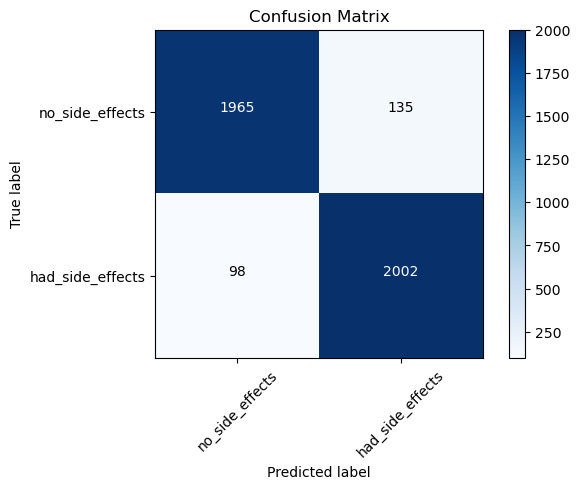

In [88]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [89]:
### saving the model

In [90]:
# this method checks to see if the file already exists
# if not, it saves the model to disk

import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
# now let's load the model

from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [92]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                32        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
# if you'd like to inspect the weights and biases of the model

new_model.get_weights()

[array([[ 0.5484248 , -0.5911027 , -0.31367615,  0.7367659 , -0.30408642,
         -0.3574236 , -0.17050788, -0.07099736, -0.05878657,  0.52168113,
          0.36185488, -0.01213461, -0.03105849, -0.22480473, -0.12572107,
         -0.13494945]], dtype=float32),
 array([-0.18273783,  0.        ,  0.        , -0.13959484,  0.        ,
         0.        ,  0.24313395,  0.        ,  0.        , -0.15097786,
         0.06179244,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 7.13640377e-02,  2.73798734e-01, -1.87373757e-01,
         -1.16317883e-01, -3.83933753e-01,  2.21261322e-01,
          2.26950869e-01,  3.62784386e-01,  3.24859411e-01,
          2.29808137e-01, -5.49570978e-01,  2.82490700e-01,
         -2.46854667e-02,  1.36989295e-01,  4.86945033e-01,
          1.89497590e-01,  1.06810026e-01, -6.23036921e-01,
         -1.07476905e-01, -3.13885033e-01,  5.41373730e-01,
         -4.97894347e-01, -2.57878423e-01,  4.58503634e-01,
 

In [95]:
new_model.optimizer

In [96]:
# we can also save this model as a JSON file
# this only saves the architecture of the model, not the weights and biases

In [97]:
# save to JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [101]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_12_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_12", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "co

In [102]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

In [105]:
# again, this model isn't trained yet, so we have to compile it
# no weights, no biases, just the architecture

model_architecture.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                32        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
# we can also save ONLY the weights of a model by using .save_weights()

import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [107]:
# because we are just saving the weights, we have to create the model first

model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'), # input layer
    Dense(units=32, activation='relu'), # hidden layer
    Dense(units=2, activation='softmax') # output layer
])

In [111]:
# load em up

model2.load_weights('models/my_model_weights.h5')

In [112]:
# checking to see!

model2.get_weights()

[array([[ 0.5484248 , -0.5911027 , -0.31367615,  0.7367659 , -0.30408642,
         -0.3574236 , -0.17050788, -0.07099736, -0.05878657,  0.52168113,
          0.36185488, -0.01213461, -0.03105849, -0.22480473, -0.12572107,
         -0.13494945]], dtype=float32),
 array([-0.18273783,  0.        ,  0.        , -0.13959484,  0.        ,
         0.        ,  0.24313395,  0.        ,  0.        , -0.15097786,
         0.06179244,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 7.13640377e-02,  2.73798734e-01, -1.87373757e-01,
         -1.16317883e-01, -3.83933753e-01,  2.21261322e-01,
          2.26950869e-01,  3.62784386e-01,  3.24859411e-01,
          2.29808137e-01, -5.49570978e-01,  2.82490700e-01,
         -2.46854667e-02,  1.36989295e-01,  4.86945033e-01,
          1.89497590e-01,  1.06810026e-01, -6.23036921e-01,
         -1.07476905e-01, -3.13885033e-01,  5.41373730e-01,
         -4.97894347e-01, -2.57878423e-01,  4.58503634e-01,
 